In [1]:
import networkx as nx
import time
import timeit
import numpy as np
import matplotlib.pyplot as plt

from file_utils import read_lines_tsv

In [2]:
# Loading dataset from file
    # source: https://graphchallenge.mit.edu/data-sets
    # file_source: https://graphchallenge.s3.amazonaws.com/snap/as20000102/as20000102_adj.tsv
    # file_format: Adjacency TSV (Tab-Separated Values)
        # <dataset-name>_adj.tsv
        # (Row, Col, Value) tuple describing the adjacency matrix of the graph in tab separated format.
        # Adjacency matrix is of size Num_vertices x Num_vertices
    # file: as20000102_adj.tsv (Autonomous Systems graph from January 02 2000)
    # num of nodes:      6.474
    # num of edges:     25.144
    # num of triangles:  6.584

start = timeit.default_timer()

G = nx.read_edgelist('../datasets/as20000102_adj.tsv', data=(('ajd_value',float),))
print(nx.info(G))

end = timeit.default_timer()
print ('elapsed time: %f' % (end - start))

Name: 
Type: Graph
Number of nodes: 6474
Number of edges: 12572
Average degree:   3.8838
elapsed time: 0.298409


In [3]:
# Alternative way to build graphs from file
# This will allow to generate random samples of graphs from a list of edges in memory

start = timeit.default_timer()

lines = read_lines_tsv('../datasets/as20000102_adj.tsv')
G = nx.parse_edgelist(lines, nodetype = int, data=(('ajd_value',float),))
print(nx.info(G))
print(('Number of lines: %s') % len(lines))

end = timeit.default_timer()
print ('elapsed time: %f' % (end - start))

Name: 
Type: Graph
Number of nodes: 6474
Number of edges: 12572
Average degree:   3.8838
Number of lines: 25144
elapsed time: 0.373471


In [4]:
start = timeit.default_timer()

print('Number of nodes: ', G.number_of_nodes())
print('Number of edges: ', G.number_of_edges())
# each triangle is counted 3 times then divided by 3
print('Number of triangles: ', int(sum(list(nx.triangles(G).values()))/3))
# clustering coefficient of G
cc = nx.average_clustering(G)
print('Clustering coefficient of G: ', cc)

end = timeit.default_timer()
print ('elapsed time: %f' % (end - start))

Number of nodes:  6474
Number of edges:  12572
Number of triangles:  6584
Clustering coefficient of G:  0.2522224351161442
elapsed time: 1.392919


In [5]:
# Using samples to build graphs and to calculate 

m, ccGraph, ccSample = [], [], []

for i in range(1000, len(lines)+1, 1000):
    start = timeit.default_timer()
    G.clear()
    sample = np.random.choice(lines, i, replace=False)
    G = nx.parse_edgelist(sample, nodetype = int, data=(('ajd_value',float),))
    current_number_nodes = G.number_of_nodes()
    m.append(current_number_nodes)
    ccGraph.append(cc)
    ccSample.append(nx.average_clustering(G))
    end = timeit.default_timer()
    print('Elapsed time for %d lines : %f, number of nodes processed: %d' % (i, (end-start), current_number_nodes))
    
#print('Graph builded with %s lines:' % i)
#print(nx.info(G))
#print('Number of triangles: ', int(sum(list(nx.triangles(G).values()))/3))
#print('---------------------------------------')

Elapsed time for 1000 lines : 0.061159, number of nodes processed: 1153
Elapsed time for 2000 lines : 0.095795, number of nodes processed: 1948
Elapsed time for 3000 lines : 0.169005, number of nodes processed: 2643
Elapsed time for 4000 lines : 0.216127, number of nodes processed: 3178
Elapsed time for 5000 lines : 0.254384, number of nodes processed: 3657
Elapsed time for 6000 lines : 0.308581, number of nodes processed: 4059
Elapsed time for 7000 lines : 0.378707, number of nodes processed: 4440
Elapsed time for 8000 lines : 0.425189, number of nodes processed: 4778
Elapsed time for 9000 lines : 0.475733, number of nodes processed: 5017
Elapsed time for 10000 lines : 0.591078, number of nodes processed: 5241
Elapsed time for 11000 lines : 0.608818, number of nodes processed: 5474
Elapsed time for 12000 lines : 0.648687, number of nodes processed: 5608
Elapsed time for 13000 lines : 0.711685, number of nodes processed: 5762
Elapsed time for 14000 lines : 0.754984, number of nodes pro

Text(0,0.5,'Clustering coefficient')

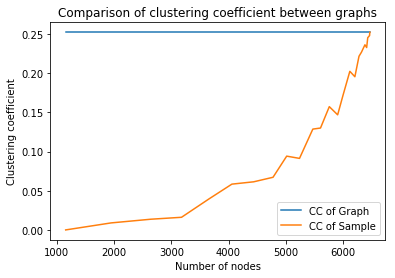

In [6]:
plt.plot(m, ccGraph, label='CC of Graph')
plt.plot(m, ccSample, label='CC of Sample')
plt.legend()
plt.title('Comparison of clustering coefficient between graphs')
plt.xlabel('Number of nodes')
plt.ylabel('Clustering coefficient')